## Assignment

Send the assignment to lmfh@cin.ufpe.br.

With the `tips` dataset:
1. Plot the distribution of the target variable (tips);
2. Plot the heat map of the correlation of the variables;
3. Generate a model, other than LinearRegression (choose any other model from https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), to predict the tips variable;
4. Show the scatter plot between the predicted and real values and the distribution plot of the difference between the predicted and real values.

https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset('tips')

from sklearn.model_selection import train_test_split
X = tips.drop('tip', axis = 1)
y = tips['tip']

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
X['sex'] = lb.fit_transform(X['sex'])
X['smoker'] = lb.fit_transform(X['smoker'])
X['day'] = lb.fit_transform(X['day'])
X['time'] = lb.fit_transform(X['time'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

X.head()

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,2,0,2
1,10.34,1,0,2,0,3
2,21.01,1,0,2,0,3
3,23.68,1,0,2,0,2
4,24.59,0,0,2,0,4


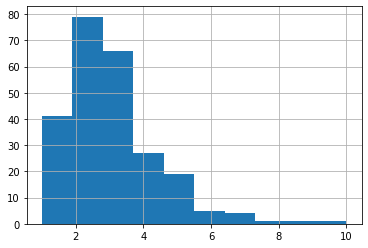

In [5]:
y.hist()

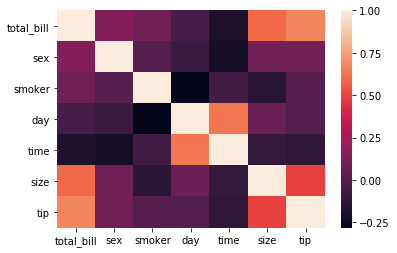

In [7]:
df = X.copy()
df["tip"] = y
sns.heatmap(df.corr())

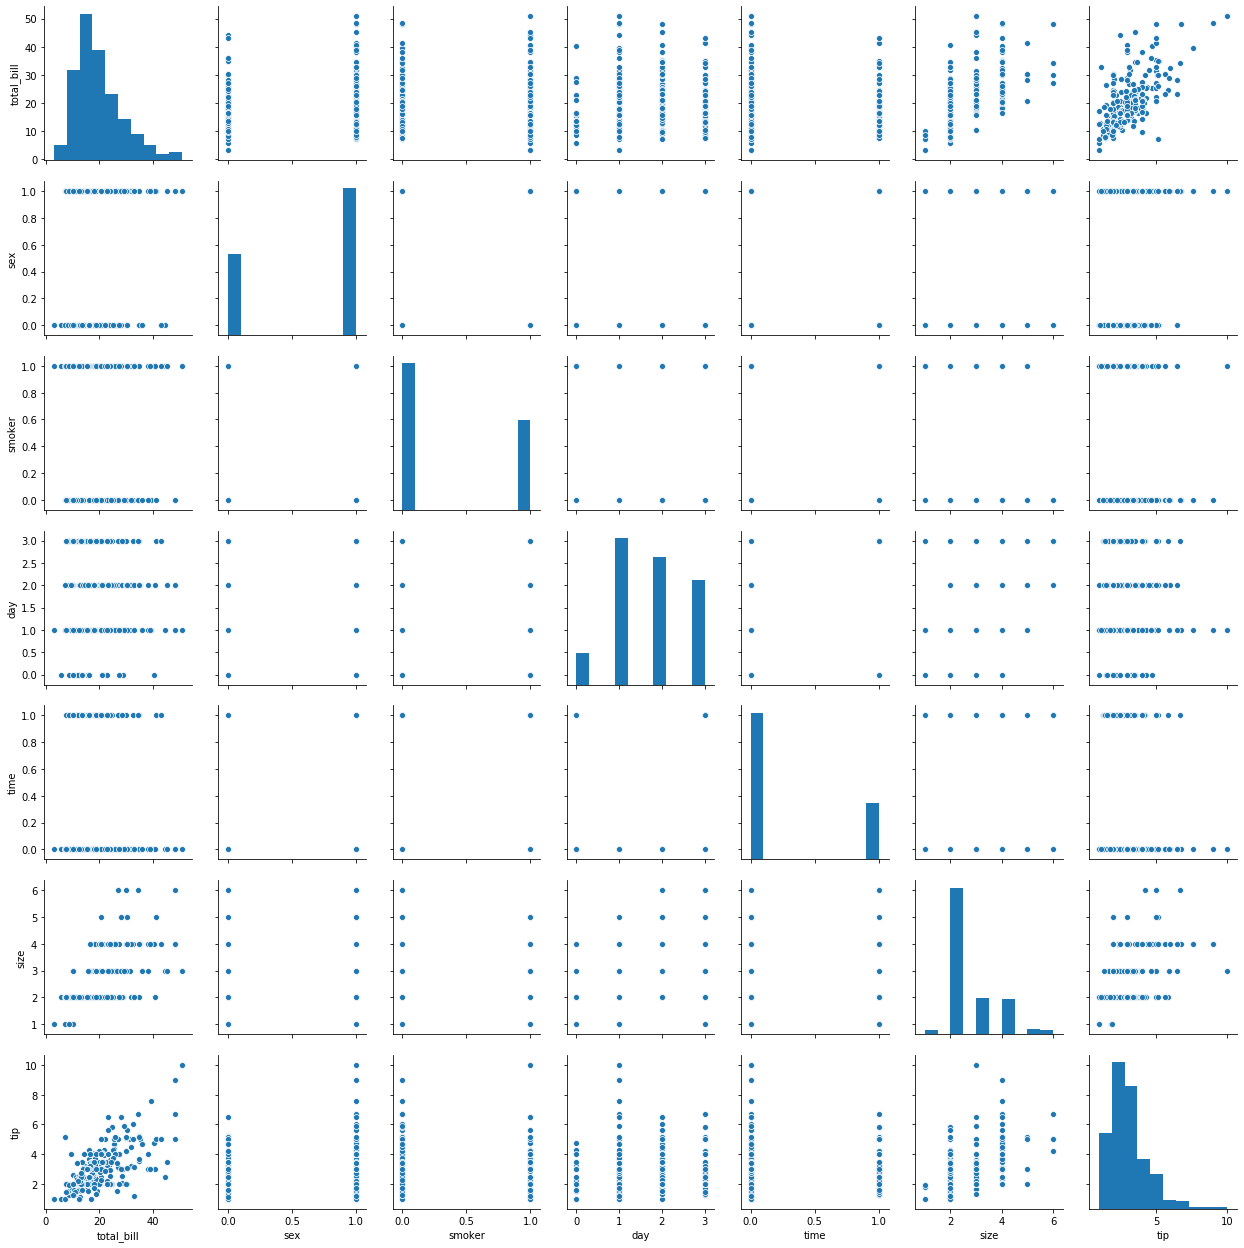

In [38]:
sns.pairplot(df)

In [30]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(
    learning_rate=0.05,
    n_estimators=300,
    verbose=1)
clf.fit(X_train.values, y_train.values)
print("R-Squared:", clf.score(X_test.values, y_test.values))

      Iter       Train Loss   Remaining Time 
         1           1.5436            0.30s
         2           1.4661            0.15s
         3           1.4011            0.10s
         4           1.3373            0.15s
         5           1.2796            0.18s
         6           1.2275            0.15s
         7           1.1826            0.17s
         8           1.1385            0.18s
         9           1.0984            0.16s
        10           1.0624            0.17s
        20           0.8283            0.13s
        30           0.6834            0.11s
        40           0.5859            0.10s
        50           0.5325            0.09s
        60           0.4844            0.08s
        70           0.4553            0.08s
        80           0.4314            0.07s
        90           0.4146            0.07s
       100           0.3956            0.06s
       200           0.2284            0.03s
       300           0.1347            0.00s
R-Squared

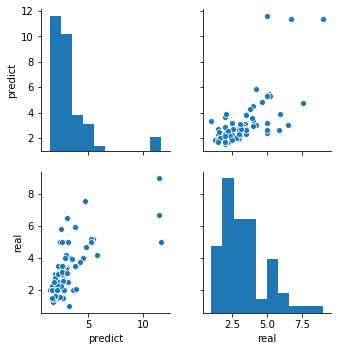

In [32]:
diff = pd.DataFrame()
diff["predict"] = clf.predict(X_test)
diff["real"] = y_test.values
sns.pairplot(diff)

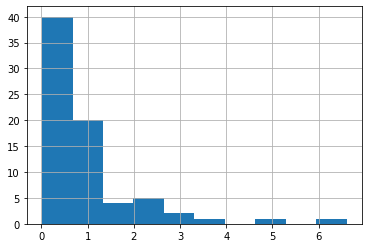

In [37]:
diff.apply(lambda x: abs(x["predict"] - x["real"]), axis=1).hist()